In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("data/DLS_grid.csv", encoding = "ISO-8859-1")
df.replace("--", np.nan, inplace=True)
df[["Radius (nm)", "Range1 Radius (I) (0.1-10nm)", "Range1 %Pd (I)"]] = df[["Radius (nm)", "Range1 Radius (I) (0.1-10nm)", "Range1 %Pd (I)"]].astype(float)

C:\Users\BEIM\AppData\Local\Temp\ipykernel_40944\3164706307.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("--", np.nan, inplace=True)


In [56]:
temp_grouped = df.groupby(["Set Temp (C)"])
temp_grouped.get_group(25.0)["Radius (nm)"]

C:\Users\BEIM\AppData\Local\Temp\ipykernel_40944\846368836.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  temp_grouped.get_group(25.0)["Radius (nm)"]


0        2.21
1     1796.85
2        1.95
3        2.59
4        1.99
       ...   
91       3.40
92       1.58
93     482.33
94       1.92
95      74.02
Name: Radius (nm), Length: 96, dtype: float64

In [34]:
well_grouped = df.groupby("Well")
well_grouped.get_group("A5")

,Item,Well,Set Temp (C),Normalized Intensity (Cnt/s),Radius (nm),%PD,Mw-R (kDa),Range1 Radius (I) (0.1-10nm),Range1 %Pd (I),Range1 %Intensity (I),...,Range4 %Mass (I),Range5 Radius (I) (5000-10000nm),Range5 %Pd (I),Range5 %Intensity (I),Range5 %Mass (I),% Acqs Unmarked,Acq Time (s),Attenuation Level (%),Intensity (Cnt/s),Laser Power (%)
4,A5,A5,25.0,2989544,1.99,33.3,16.8,2.10,23.41,87.4,...,NaN,NaN,NaN,NaN,NaN,87,5.0,0.0,896863,30.0
100,A5,A5,35.0,3316935,2.72,Multimodal,35.0,1.57,35.44,81.9,...,NaN,NaN,NaN,NaN,NaN,100,5.0,0.0,829234,25.0
196,A5,A5,45.0,3074346,2.66,Multimodal,33.2,1.54,25.37,84.0,...,NaN,NaN,NaN,NaN,NaN,87,5.0,4.7,1024975,35.0
292,A5,A5,55.0,3367936,2.89,Multimodal,40.2,1.49,26.54,80.9,...,NaN,NaN,NaN,NaN,NaN,62,5.0,11.6,1042414,35.0
388,A5,A5,65.0,4588319,3.34,Multimodal,56.6,1.67,30.02,74.0,...,NaN,NaN,NaN,NaN,NaN,50,5.0,0.0,1147080,25.0
484,A5,A5,75.0,33403315,10.42,Multimodal,810.0,2.35,22.70,39.0,...,NaN,NaN,NaN,NaN,NaN,100,5.0,45.0,1837182,10.0
580,A5,A5,85.0,4897499,4.04,Multimodal,88.5,3.51,23.37,78.1,...,NaN,NaN,NaN,NaN,NaN,100,5.0,38.4,753725,25.0


In [51]:
well_grouped["Range1 %Pd (I)"].mean()

Well
A1     21.815714
A10          NaN
A11    25.850000
A12    27.017143
A2           NaN
         ...    
H5     19.296000
H6     22.168000
H7     32.240000
H8     40.756000
H9     32.984000
Name: Range1 %Pd (I), Length: 96, dtype: float64

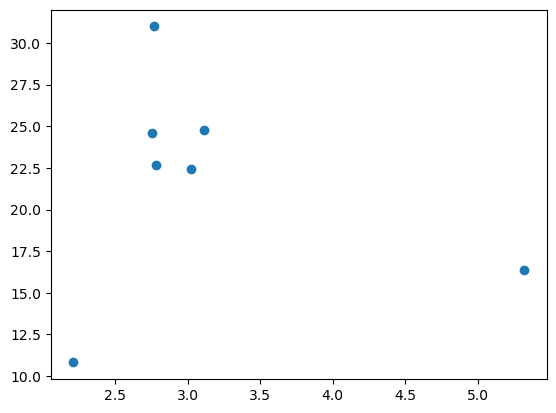

In [59]:
plt.scatter(well_grouped.get_group("A1")["Radius (nm)"], well_grouped.get_group("A1")["Range1 %Pd (I)"])
for i, label in enumerate(well_grouped.get_group("A1")["Set Temp (C)"]):
    plt.annotate(label, )

In [69]:
df.loc[df["Set Temp (C)"] == 25.0, ["Radius (nm)","Range1 %Pd (I)"]]

,Radius (nm),Range1 %Pd (I)
0,2.21,10.82
1,1796.85,NaN
2,1.95,29.01
3,2.59,12.91
4,1.99,23.41
...,...,...
91,3.40,34.54
92,1.58,32.40
93,482.33,49.33
94,1.92,22.44


In [76]:
radius = df.loc[df["Set Temp (C)"] == 25.0, ["Well"]]
radius

,Well
0,A1
1,A2
2,A3
3,A4
4,A5
...,...
91,H8
92,H9
93,H10
94,H11


In [77]:
for temperature in df.loc[df["Well"] == "A1", ["Set Temp (C)"]]:
    radius[str(temperature)] = df[df["Set Temp (C)"] == temperature]
radius

ValueError: Cannot set a DataFrame with multiple columns to the single column Set Temp (C)

In [87]:
for i in df.loc[df["Well"] == "A1", ["Set Temp (C)"]]:
    print(i)

Set Temp (C)


In [85]:
df.loc[df["Well"] == "A1", ["Set Temp (C)"]]

AttributeError: 'DataFrame' object has no attribute 'iteritems'